# TensorFlow com a base de dados Mnist

# Importando as bibliotecas necessárias

In [55]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

# Importando a base de dados diretamente com o OneHotEncoder

In [2]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Separamos as base de dados em treino e teste

In [3]:
x_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
x_teste = mnist.test.images
y_teste = mnist.test.labels

In [4]:
[x_treinamento.shape, y_treinamento.shape, x_teste.shape, y_teste.shape]

[(55000, 784), (55000, 10), (10000, 784), (10000, 10)]

# Visualizamos como são as imagens que estão na base de dados

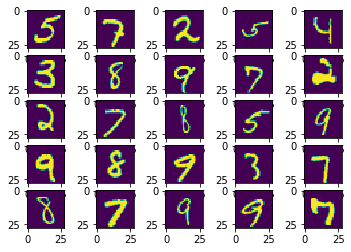

In [58]:
%matplotlib inline
n=5
f, axarr = plt.subplots(n,n)
for i in range(n):
    for k in range(n):
        axarr[i,k].imshow(x_treinamento[random.randrange(55000)].reshape(28,28))

# Definimos quantos neurônios de entrada teremos:
Como são 784 features, precisamos ter 784 neurônios na camada de entrada

In [6]:
# É importante deixar de uma forma dinâmica caso a base de dados mude
neuronios_entrada = x_treinamento.shape[1]
neuronios_entrada

784

In [7]:
# Decidido usar 3 camadas ocultas de neurônios para o treinamento
# as camadas ocultas vão utilizar a formula: camadas de entrada + camadas de saida /2
# para calcular a quantidade de neuronios em cada

neuronios_oculta1 = int((x_treinamento.shape[1] + y_treinamento.shape[1])/2)
neuronios_oculta2 = neuronios_oculta1
neuronios_oculta3= neuronios_oculta1
neuronios_saida = y_treinamento.shape[1]


# Definindo as camadas ocultas

In [8]:
w = {'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta1])), 
    'oculta2':tf.Variable(tf.random_normal([neuronios_oculta1, neuronios_oculta2])),
    'oculta3':tf.Variable(tf.random_normal([neuronios_oculta2, neuronios_oculta3])),
    'saida' : tf.Variable(tf.random_normal([neuronios_oculta3, neuronios_saida]))}

# Definindo as camadas de Bias

In [9]:
b = {'oculta1': tf.Variable(tf.random_normal([neuronios_oculta1])),
    'oculta2':tf.Variable(tf.random_normal([neuronios_oculta2])),
    'oculta3':tf.Variable(tf.random_normal([neuronios_oculta3])),
    'saida':tf.Variable(tf.random_normal([neuronios_saida])),
}

# Definindo os Place Holders

In [10]:
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

# Definindo a função que vai calcular os pesos

In [11]:
def mlp(x,w,bias):
    camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(x, w['oculta1']),bias['oculta1']))
    camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, w['oculta3']),bias['oculta2']))
    camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, w['oculta2']),bias['oculta3']))
    camada_saida = tf.add(tf.matmul(camada_oculta3,w['saida']),bias['saida'])
    return camada_saida

# Definição do modelo, erro e otimizador

In [12]:
modelo=mlp(xph,w,b)
erro=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = modelo, labels = yph))
otimizador = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(erro)

# Definindo as previsoes para verificação da taxa de acerto

In [13]:
previsoes = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes, 1), tf.argmax(yph,1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

# Treinando a rede neural

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epocas in range(10000):
        x_batch, y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador,erro], feed_dict={xph: x_batch, yph: y_batch})
        if epocas % 10000 == 0:
            acc = sess.run([taxa_acerto], feed_dict={xph: x_batch, yph: y_batch})
            print('época: ' +str((epocas+1) ) + ' erro: ' + str(custo) + ' acc:' + str(acc))
            
    print('treinamento concluido')
    print(sess.run(taxa_acerto, feed_dict = {xph: x_teste, yph: y_teste}))

época: 1 erro: 42226.96 acc:[0.03125]
treinamento concluido
0.9135
